In [26]:
import os
import glob
import rasterio
import rasterio.plot
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
# Directories
BASE_DIR = os.path.abspath("..")  # Parent directory; adjust if needed
MODIS_TIF_DIR = os.path.join(BASE_DIR, "data", "raw", "modis_tif")
GRID_PATH = os.path.join(BASE_DIR, "data", "raw", "ca_grid_10km.shp")
NDVI_CSV = os.path.join(BASE_DIR, "data", "processed", "modis_ndvi_10km.csv")

print("BASE_DIR:       ", BASE_DIR)
print("MODIS_TIF_DIR:  ", MODIS_TIF_DIR)
print("GRID_PATH:      ", GRID_PATH)
print("NDVI_CSV:       ", NDVI_CSV)

BASE_DIR:        /Users/tobiascanavesi/Documents/wildifre_prevention
MODIS_TIF_DIR:   /Users/tobiascanavesi/Documents/wildifre_prevention/data/raw/modis_tif
GRID_PATH:       /Users/tobiascanavesi/Documents/wildifre_prevention/data/raw/ca_grid_10km.shp
NDVI_CSV:        /Users/tobiascanavesi/Documents/wildifre_prevention/data/processed/modis_ndvi_10km.csv


Found TIF files: 793
First five TIF files: ['/Users/tobiascanavesi/Documents/wildifre_prevention/data/raw/modis_tif/California_MYD13A3_NDVI.tif', '/Users/tobiascanavesi/Documents/wildifre_prevention/data/raw/modis_tif/MYD13A3.061__1_km_monthly_EVI_doy2019001_aid0001.tif', '/Users/tobiascanavesi/Documents/wildifre_prevention/data/raw/modis_tif/MYD13A3.061__1_km_monthly_EVI_doy2019032_aid0001.tif', '/Users/tobiascanavesi/Documents/wildifre_prevention/data/raw/modis_tif/MYD13A3.061__1_km_monthly_EVI_doy2019060_aid0001.tif', '/Users/tobiascanavesi/Documents/wildifre_prevention/data/raw/modis_tif/MYD13A3.061__1_km_monthly_EVI_doy2019091_aid0001.tif']
Loading sample TIF: /Users/tobiascanavesi/Documents/wildifre_prevention/data/raw/modis_tif/California_MYD13A3_NDVI.tif
TIF CRS: GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST

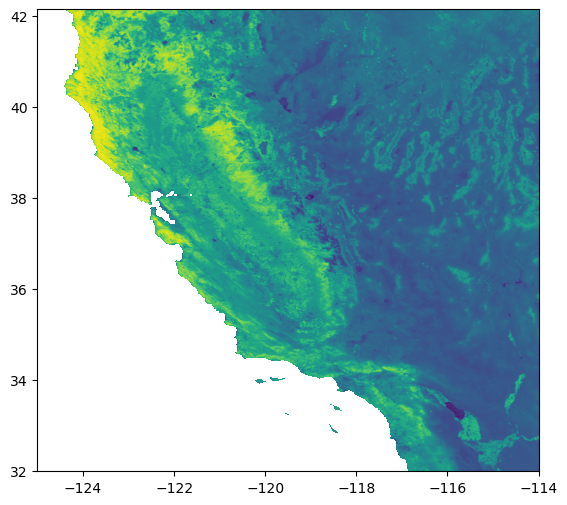

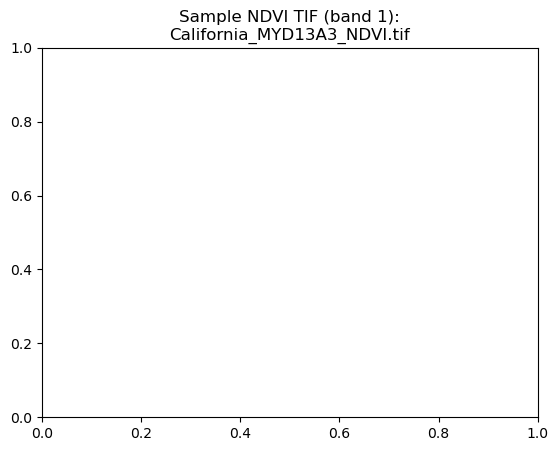

Min NDVI (>=0): 0.0
Max NDVI (>=0): 8990.225352112677


In [27]:
# In[2]:
# 1) Let's pick ONE TIF file to visualize (e.g., a real NDVI file).
tif_files = sorted(glob.glob(os.path.join(MODIS_TIF_DIR, "*.tif")))
print("Found TIF files:", len(tif_files))
if len(tif_files) > 0:
    print("First five TIF files:", tif_files[:5])
    
    sample_tif = tif_files[0]
    print(f"Loading sample TIF: {sample_tif}")
    
    # Read with rasterio
    with rasterio.open(sample_tif) as src:
        print("TIF CRS:", src.crs)
        print("TIF shape (rows, cols):", src.shape)
        print("Transform:", src.transform)
        
        ndvi_data = src.read(1)  # first band
        # Quick plot
        plt.figure(figsize=(8, 6))
        rasterio.plot.show(src, cmap='viridis')
        plt.title(f"Sample NDVI TIF (band 1):\n{os.path.basename(sample_tif)}")
        plt.show()
        
        # Basic stats on non-negative values (assuming negative is fill)
        valid_pixels = ndvi_data[ndvi_data >= 0]
        print("Min NDVI (>=0):", valid_pixels.min() if valid_pixels.size else None)
        print("Max NDVI (>=0):", valid_pixels.max() if valid_pixels.size else None)
else:
    print("No TIF files found in", MODIS_TIF_DIR, "Check your directory path.")



--- 10 km Grid Info ---
Grid CRS:           epsg:4326
Number of cells:    9880
   cell_id                                           geometry
0        0  POLYGON ((-124.48000 32.53000, -124.48000 32.6...
1        1  POLYGON ((-124.48000 32.63000, -124.48000 32.7...
2        2  POLYGON ((-124.48000 32.73000, -124.48000 32.8...
3        3  POLYGON ((-124.48000 32.83000, -124.48000 32.9...
4        4  POLYGON ((-124.48000 32.93000, -124.48000 33.0...


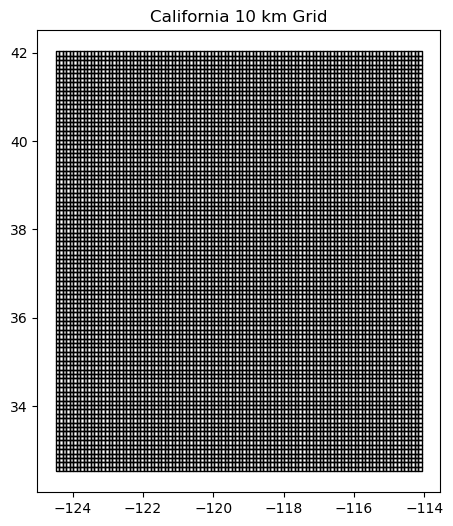

In [28]:
# In[3]:
# 2) Visualize your 10 km grid shapefile with GeoPandas
if os.path.exists(GRID_PATH):
    grid_gdf = gpd.read_file(GRID_PATH)
    print("\n--- 10 km Grid Info ---")
    print("Grid CRS:          ", grid_gdf.crs)
    print("Number of cells:   ", len(grid_gdf))
    print(grid_gdf.head())
    
    # Quick plot
    ax = grid_gdf.plot(figsize=(6, 6), edgecolor="black", facecolor="none")
    plt.title("California 10 km Grid")
    plt.show()
else:
    print(f"[Error] Grid shapefile not found at {GRID_PATH}")


--- NDVI CSV Info ---
NDVI CSV shape: (4979520, 3)
   cell_id  ndvi        date
0        0   NaN  2019-01-01
1        1   NaN  2019-01-01
2        2   NaN  2019-01-01
3        3   NaN  2019-01-01
4        4   NaN  2019-01-01
5        5   NaN  2019-01-01
6        6   NaN  2019-01-01
7        7   NaN  2019-01-01
8        8   NaN  2019-01-01
9        9   NaN  2019-01-01
Number of NaN NDVI values: 4979520
NDVI min: nan
NDVI max: nan


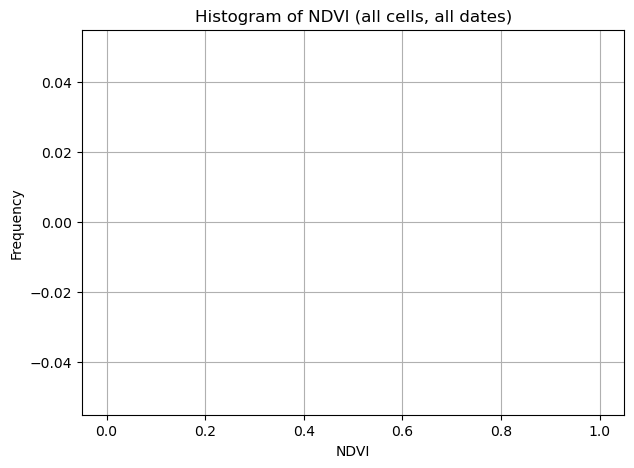

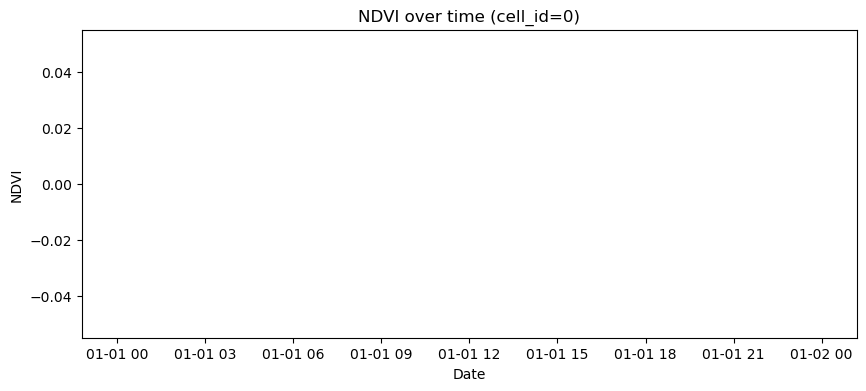

In [29]:
# In[4]:
# 3) Load the NDVI CSV and do some quick exploration
if os.path.exists(NDVI_CSV):
    df_ndvi = pd.read_csv(NDVI_CSV)
    print("\n--- NDVI CSV Info ---")
    print("NDVI CSV shape:", df_ndvi.shape)
    print(df_ndvi.head(10))
    
    # Check how many NaNs we have
    nan_count = df_ndvi['ndvi'].isna().sum()
    print("Number of NaN NDVI values:", nan_count)
    
    # Basic NDVI stats
    # If you need to apply a scale factor, do: df_ndvi['ndvi'] *= 0.0001
    ndvi_min = df_ndvi['ndvi'].min(skipna=True)
    ndvi_max = df_ndvi['ndvi'].max(skipna=True)
    print("NDVI min:", ndvi_min)
    print("NDVI max:", ndvi_max)
    
    # 4) Plot a quick histogram of NDVI
    plt.figure(figsize=(7, 5))
    df_ndvi['ndvi'].dropna().hist(bins=50)
    plt.title("Histogram of NDVI (all cells, all dates)")
    plt.xlabel("NDVI")
    plt.ylabel("Frequency")
    plt.show()
    
    # 5) Plot time-series for a sample cell
    sample_cell_id = 0  # pick any cell ID that exists in your data
    cell_data = df_ndvi[df_ndvi['cell_id'] == sample_cell_id].copy()
    if not cell_data.empty:
        cell_data['date'] = pd.to_datetime(cell_data['date'])
        cell_data.sort_values('date', inplace=True)
        
        plt.figure(figsize=(10, 4))
        plt.plot(cell_data['date'], cell_data['ndvi'], marker='o')
        plt.title(f"NDVI over time (cell_id={sample_cell_id})")
        plt.xlabel("Date")
        plt.ylabel("NDVI")
        plt.show()
    else:
        print(f"[Info] No records found for cell_id={sample_cell_id}")
else:
    print(f"[Error] NDVI CSV not found at {NDVI_CSV}")

In [30]:
# In[1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Adjust these paths as needed for your local setup
BASE_DIR = os.path.abspath(".")
GRID_PATH = os.path.join(BASE_DIR, "data", "raw", "ca_grid_10km.shp")
NDVI_CSV  = os.path.join(BASE_DIR, "data", "processed", "modis_ndvi_10km.csv")

print("GRID_PATH:", GRID_PATH)
print("NDVI_CSV: ", NDVI_CSV)


# In[2]:
# 1) Load the shapefile of CA 10 km grid
if not os.path.exists(GRID_PATH):
    print(f"[Error] {GRID_PATH} does not exist. Please check path.")
else:
    grid_gdf = gpd.read_file(GRID_PATH)
    print("Grid CRS:", grid_gdf.crs)
    print("Number of grid cells:", len(grid_gdf))
    print(grid_gdf.head())


# In[3]:
# 2) Load the NDVI CSV
if not os.path.exists(NDVI_CSV):
    print(f"[Error] {NDVI_CSV} does not exist. Please check path.")
else:
    df_ndvi = pd.read_csv(NDVI_CSV)
    print(f"NDVI CSV shape: {df_ndvi.shape}")
    print(df_ndvi.head(10))
    
    # Convert 'date' to datetime (if not already)
    if 'date' in df_ndvi.columns:
        df_ndvi['date'] = pd.to_datetime(df_ndvi['date'])

    # Some quick stats on NaNs
    total_count = len(df_ndvi)
    nan_count = df_ndvi['ndvi'].isna().sum()
    print(f"Total records: {total_count}")
    print(f"NaN NDVI count: {nan_count}")
    print(f"Fraction of NDVI that is NaN: {nan_count / total_count:.2%}")

    # Group by date to see which days have the most missing NDVI
    missing_by_date = (df_ndvi.groupby('date')['ndvi']
                                 .apply(lambda x: x.isna().sum())
                                 .reset_index(name='nan_count'))
    print("\n--- Missing NDVI by date ---")
    print(missing_by_date.head(15))  # show first 15 dates


# In[4]:
# 3) Merge NDVI with the grid to map a single date and see distribution
#    We'll pick a date that exists in df_ndvi (e.g., the earliest or a known date).
if not df_ndvi.empty:
    # Let's pick a single date. You can replace with your desired date:
    unique_dates = sorted(df_ndvi['date'].dropna().unique())
    if len(unique_dates) > 0:
        sample_date = unique_dates[0]  # earliest date in the data
        print(f"Plotting NDVI map for date={sample_date}")

        # Filter df_ndvi for just that date
        df_sample = df_ndvi[df_ndvi['date'] == sample_date].copy()

        # Merge with grid on 'cell_id'
        # We'll have a GeoDataFrame with geometry + NDVI
        gdf_sample = grid_gdf.merge(df_sample, on='cell_id', how='left') 
        # some cells might not have NDVI for that date => NaN

        # Quick stats for this date
        valid_ct = gdf_sample['ndvi'].notna().sum()
        nan_ct = gdf_sample['ndvi'].isna().sum()
        breakpoint()
        print(f"For {sample_date.date()}, valid NDVI in {valid_ct} cells, NaN in {nan_ct} cells")

        # Plot a choropleth by NDVI
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        # We'll define a colormap that sets NaN to grey
        # We can use 'cmap="viridis"' or any other
        gdf_sample.plot(column='ndvi',
                        cmap='YlGn',
                        legend=True,
                        missing_kwds={"color": "lightgrey", "label": "No NDVI"},
                        ax=ax)
        plt.title(f"NDVI on {sample_date.date()}\n(Green = higher NDVI, Grey = No Data)")
        ax.set_axis_off()
        plt.show()

    else:
        print("[Info] No valid dates found in NDVI CSV.")


GRID_PATH: /Users/tobiascanavesi/Documents/wildifre_prevention/src/data/raw/ca_grid_10km.shp
NDVI_CSV:  /Users/tobiascanavesi/Documents/wildifre_prevention/src/data/processed/modis_ndvi_10km.csv
[Error] /Users/tobiascanavesi/Documents/wildifre_prevention/src/data/raw/ca_grid_10km.shp does not exist. Please check path.
[Error] /Users/tobiascanavesi/Documents/wildifre_prevention/src/data/processed/modis_ndvi_10km.csv does not exist. Please check path.
Plotting NDVI map for date=2019-01-01


AttributeError: 'str' object has no attribute 'date'